In [1]:
import pandas as pd
import numpy as np

In [2]:
best_pose = pd.read_csv("best_pose_58263e34-a45c-11ee-88ec-eb6a8d5269b4(in).csv")

In [3]:
best_pose.head()

,Unnamed: 0,time,heightStdDev,longitudeStdDev,groupMetadataID,latitudeStdDev,differentialAge,longitude,solType,solutionAge,solStatus,latitude,numSatsInSolution
0,0,1.694450e+18,0.030676,0.012783,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.012411,1.0,-82.135228,NARROW_INT,0.0,SOL_COMPUTED,39.378104,14
1,0,1.694450e+18,0.218763,0.136896,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.080366,1.0,-82.143940,NARROW_INT,0.0,SOL_COMPUTED,39.382745,10
2,1,1.694450e+18,0.027027,0.013242,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.015331,1.0,-82.114507,NARROW_INT,0.0,SOL_COMPUTED,39.329850,13
3,0,1.694450e+18,0.021111,0.010912,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.011871,1.0,-82.127983,NARROW_INT,0.0,SOL_COMPUTED,39.330354,15
4,0,1.694450e+18,0.019266,0.008685,58263e34-a45c-11ee-88ec-eb6a8d5269b4,0.010546,1.0,-82.105102,NARROW_INT,0.0,SOL_COMPUTED,39.320441,15


In [4]:
features = [ "latitude", "longitude", "latitudeStdDev", "longitudeStdDev", "numSatsInSolution" ]

In [5]:
best_pose = best_pose.dropna(subset=features)

In [6]:
data = best_pose[features].copy()

In [7]:
data

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
0,39.378104,-82.135228,0.012411,0.012783,14
1,39.382745,-82.143940,0.080366,0.136896,10
2,39.329850,-82.114507,0.015331,0.013242,13
3,39.330354,-82.127983,0.011871,0.010912,15
4,39.320441,-82.105102,0.010546,0.008685,15
...,...,...,...,...,...
2006,39.323621,-82.104320,0.014480,0.022711,8
2007,39.330300,-82.127426,0.008630,0.007843,16
2008,39.327638,-82.103031,0.137115,0.455607,8
2009,39.372002,-82.133260,0.013364,0.011439,13


In [8]:
data = ((data - data.min())/(data.max()-data.min())) * 9 + 1

In [9]:
data.describe()

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,4.632214,5.199444,1.029901,1.022175,7.209466
std,2.912224,2.952936,0.235410,0.216398,1.397867
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.309657,2.850283,1.001017,1.000741,6.294118
50%,3.159102,4.041927,1.001876,1.001255,7.352941
75%,7.557323,8.744057,1.003664,1.002507,8.411765
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
0,8.719437,2.917401,1.001490,1.001189,8.411765
1,9.325602,1.101069,1.028005,1.031030,6.294118
2,2.417374,7.237325,1.002629,1.001299,7.882353
3,2.483260,4.427697,1.001279,1.000739,8.941176
4,1.188602,9.197942,1.000762,1.000204,8.941176


In [11]:
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data,5)

/tmp/ipykernel_98195/2304504329.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [13]:
centroids

,0,1,2,3,4
latitude,2.368771,2.476150,4.083464,8.740063,2.386585
longitude,9.294616,3.789819,4.437464,9.738563,2.301973
latitudeStdDev,1.000469,1.001400,1.002723,1.001157,1.002209
longitudeStdDev,1.001574,1.001660,1.030595,1.000671,1.000426
numSatsInSolution,8.941176,7.352941,8.941176,6.823529,7.882353


In [14]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [15]:
labels = get_labels(data, centroids)

In [16]:
labels.value_counts()

2    880
0    669
1    323
4    130
3      9
Name: count, dtype: int64

In [17]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

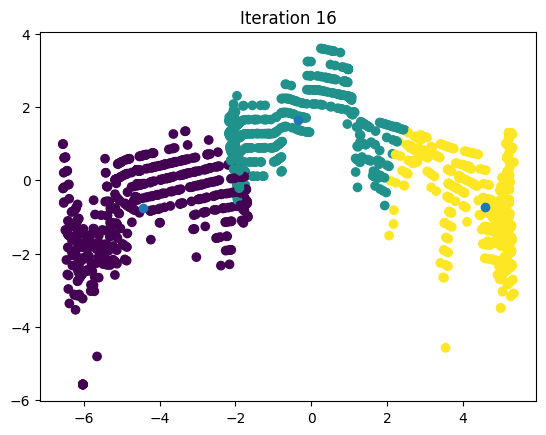

In [23]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [24]:
centroids

,0,1,2
latitude,8.248610,3.405742,1.883472
longitude,2.526213,3.512731,8.899471
latitudeStdDev,1.051143,1.002607,1.009828
longitudeStdDev,1.037044,1.001691,1.009508
numSatsInSolution,6.987196,7.566524,6.646864


In [25]:
labels.value_counts()

2    703
0    688
1    620
Name: count, dtype: int64

In [26]:
best_pose[labels == 0][["groupMetadataID"] + features]

,groupMetadataID,latitude,longitude,latitudeStdDev,longitudeStdDev,numSatsInSolution
0,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.378104,-82.135228,0.012411,0.012783,14
1,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.382745,-82.143940,0.080366,0.136896,10
16,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.379286,-82.135537,0.011650,0.011153,14
23,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.379756,-82.144425,23.074265,37.439820,5
24,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.381034,-82.135988,0.009787,0.009421,15
...,...,...,...,...,...,...
1999,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.378275,-82.143163,2.044337,2.153884,7
2003,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.367235,-82.131622,0.013208,0.013380,13
2005,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.378281,-82.135748,0.013000,0.010093,13
2009,58263e34-a45c-11ee-88ec-eb6a8d5269b4,39.372002,-82.133260,0.013364,0.011439,13


In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [29]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
latitude,8.497516,1.938196,3.765713
longitude,2.647133,8.964958,3.696167
latitudeStdDev,1.079464,1.010735,1.002726
longitudeStdDev,1.057017,1.010027,1.001684
numSatsInSolution,7.287490,6.765377,7.599106
